# LINEAR REGRESSION PRACTICAL IMPLEMENTATION

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
from sklearn.datasets import fetch_california_housing

df=fetch_california_housing()
df


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [15]:
dataset=pd.DataFrame(df.data)

In [16]:
dataset.columns= df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# INDEPENDENT FEATURES AND DEPENDENT FEATURES

In [ ]:
X = dataset
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
y=df.target

In [64]:
y


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

# TRAIN TEST SPLIT

In [33]:
# import karo train_test_split from sklearn.model_selection google karke dekho
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [35]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [78]:
y_train

array([1.214, 3.637, 2.056, ..., 2.221, 2.835, 3.25 ], shape=(13828,))

In [79]:
X_test

array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
         0.19154848,  0.28682423],
       [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
        -0.23956945,  0.06239148],
       [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
         1.0069237 , -1.42385206],
       ...,
       [-0.02167353, -1.07613702,  0.40141018, ...,  0.03744641,
         1.43335556, -0.90516304],
       [ 0.27275111, -1.47295261,  0.29311784, ...,  0.0519346 ,
        -0.73160623,  1.09478213],
       [-0.59570436,  1.78093523, -0.64482761, ..., -0.06665881,
         0.99755157, -1.43881424]], shape=(6812, 8))

In [81]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.07   , 1.307  , 3.071  ],
      shape=(6812,))

In [36]:
# STANDARDIZING THE DATA 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
x_train = scaler.fit_transform(X_train)

In [38]:
X_test= scaler.transform(X_test)


In [39]:
scaler.inverse_transform(x_train)

array([[   0.9809    ,   19.        ,    3.18772563, ...,    2.62093863,
          33.98      , -118.28      ],
       [   4.2232    ,   33.        ,    6.18969555, ...,    2.37704918,
          37.46      , -122.23      ],
       [   3.5488    ,   42.        ,    4.82157676, ...,    4.33195021,
          33.79      , -118.26      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]], shape=(13828, 8))

# IMPORTING LINEAR REGRESSION API

In [40]:
from sklearn.linear_model import LinearRegression
# cross valdation ke liye library use hoti h
from sklearn.model_selection import cross_val_score


In [57]:
regression = LinearRegression()
regression.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
mse=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)  # cv means cross validation kitne parts me karna h 5 means 5 parts me karna h

In [66]:
np.mean(mse)

np.float64(-0.5221889833984608)

# prediction

In [59]:
reg_predict = regression.predict(X_test)

d:\python\numpy\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
reg_predict

array([-37.87252743, -37.13445515, -36.73330634, ..., -37.45981676,
       -37.32540359, -37.21061159], shape=(6812,))

# SEABORN IMPORT KAR RAHE H

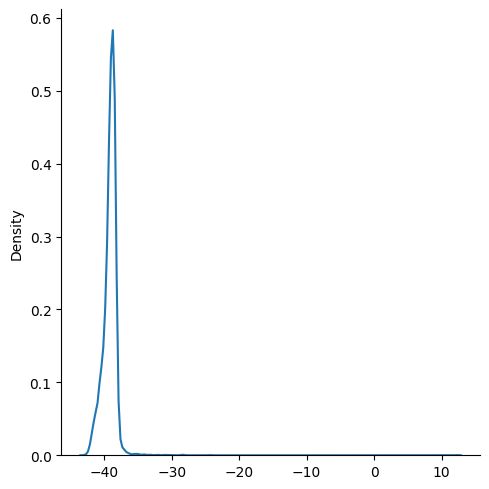

In [63]:
import seaborn as sns
sns.displot(reg_predict - y_test,kind='kde')

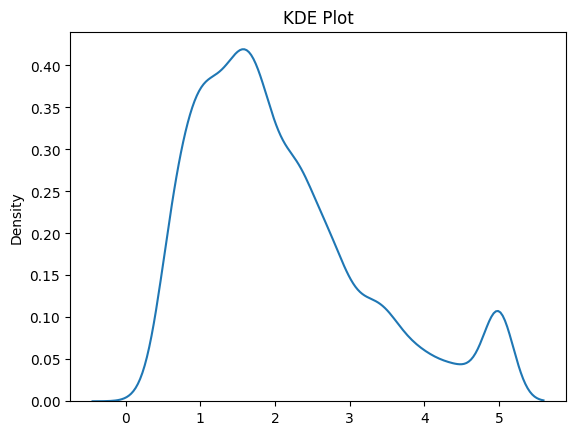

In [77]:
sns.kdeplot(y_test)
plt.title("KDE Plot")
plt.show()

Predicted Marks for 5 hours: [110. 130. 150.]


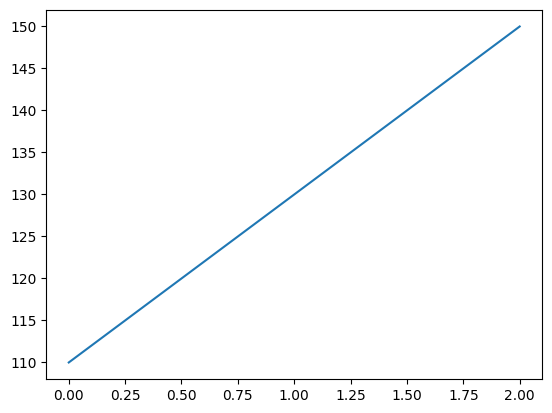

In [85]:

# Data
X = np.array([[1], [2], [3], [4]])
y = np.array([30, 50, 70, 90])

# Step 1: Train model
model = LinearRegression()
model.fit(X, y) 

# basically ek pattern ko follow karke further outputs predict karta h

# Step 2: Predict new value
y_pred = model.predict([[5],[6],[7]])  
print("Predicted Marks for 5 hours:", y_pred)

plt.plot(y_pred)